In [134]:
import pandas as pd
import numpy as np

In [135]:
import pandas as pd

df = pd.read_csv("/Users/Jiwon/Documents/GitHub/practical_project/csv/스마트팜_수정데이터.csv", encoding="cp949")

df

,농장아이디,개체번호,축종코드,제조사 아이디,측정일시,착유량,착유시작일시,착유종료일시,착유회차,전도도,체세포,혈액흐름,온도,유지방,유단백,공기흐름,수집일자,수집건수
0,20278,20130816010079,D00,agrirobotech,2021-09-01 6:52,16,2021-09-01 6:52,2021-09-01 7:04,1,7.1,NaN,N,39.9,4.1,3.3,1.5,20210902,1
1,20278,20130816010079,D00,agrirobotech,2021-09-01 17:02,17,2021-09-01 17:02,2021-09-01 17:11,2,6.8,NaN,N,40.2,4.5,3.2,2.1,20210902,1
2,20278,20130816010079,D00,agrirobotech,2021-09-02 1:41,14,2021-09-02 1:41,2021-09-02 1:51,1,6.8,NaN,N,39.9,4.8,3.1,1.9,20210903,1
3,20278,20130816010079,D00,agrirobotech,2021-09-02 7:28,10,2021-09-02 7:28,2021-09-02 7:36,2,6.8,NaN,N,39.6,5.0,3.1,1.7,20210903,1
4,20278,20130816010079,D00,agrirobotech,2021-09-02 14:33,11,2021-09-02 14:33,2021-09-02 14:45,3,6.8,NaN,N,40.0,4.7,3.2,1.3,20210903,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,20264,20191027020116,D00,agrirobotech,2021-09-25 1:29,9,2021-09-25 1:29,2021-09-25 1:35,1,6.2,NaN,N,38.8,3.3,3.3,3.7,20210926,1
27922,20264,20191027020116,D00,agrirobotech,2021-09-25 9:15,9,2021-09-25 9:15,2021-09-25 9:21,2,6.4,NaN,N,39.2,2.8,3.3,3.7,20210926,1
27923,20264,20191027020116,D00,agrirobotech,2021-09-25 19:28,11,2021-09-25 19:28,2021-09-25 19:35,3,6.4,NaN,N,39.5,2.5,3.4,3.9,20210926,1
27924,20264,20191027020116,D00,agrirobotech,2021-09-26 8:22,13,2021-09-26 8:22,2021-09-26 8:29,1,6.2,NaN,N,39.4,2.8,3.4,4.0,20210927,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27926 entries, 0 to 27925
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   농장아이디    27926 non-null  int64  
 1   개체번호     27926 non-null  int64  
 2   축종코드     27926 non-null  object 
 3   제조사 아이디  27926 non-null  object 
 4   측정일시     27926 non-null  object 
 5   착유량      27926 non-null  int64  
 6   착유시작일시   27926 non-null  object 
 7   착유종료일시   27926 non-null  object 
 8   착유회차     27926 non-null  int64  
 9   전도도      27926 non-null  float64
 10  체세포      0 non-null      float64
 11  혈액흐름     27926 non-null  object 
 12  온도       27926 non-null  float64
 13  유지방      27874 non-null  float64
 14  유단백      27874 non-null  float64
 15  공기흐름     27926 non-null  float64
 16  수집일자     27926 non-null  int64  
 17  수집건수     27926 non-null  int64  
dtypes: float64(6), int64(6), object(6)
memory usage: 3.8+ MB


== 전처리 ==
체세포 전부 null  -> 컬럼 제거
온도, 유지방 null 존재  -> 결측치 제거
착유시작일시, 착유종료일시 -> datetype으로 변경
수집건수 모두 1 -> 컬럼 제거
측정일시 = 착유시작일시 -> 측정일시 컬럼 제거
제조사 아이디 모두 동일 -> 컬럼 제거
축종코드 모두 동일 -> 컬럼 제거
20338, 20261 완전 더블링 --> 따라서 20261 제거

In [137]:
# 체세포, 수집건수, 수집일자, 측정일시, 제조사 아이디, 축종코드 컬럼 제거

df = df.drop(columns=['체세포', '수집건수', '수집일자', '측정일시', '제조사 아이디', '축종코드'])

In [138]:
# 20261 농장 데이터 삭제하기

df.drop(df[df['농장아이디'] == 20261].index, inplace=True)

In [139]:
df[df['개체번호']== 20130816010079]

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름
0,20278,20130816010079,16,2021-09-01 6:52,2021-09-01 7:04,1,7.1,N,39.9,4.1,3.3,1.5
1,20278,20130816010079,17,2021-09-01 17:02,2021-09-01 17:11,2,6.8,N,40.2,4.5,3.2,2.1
2,20278,20130816010079,14,2021-09-02 1:41,2021-09-02 1:51,1,6.8,N,39.9,4.8,3.1,1.9
3,20278,20130816010079,10,2021-09-02 7:28,2021-09-02 7:36,2,6.8,N,39.6,5.0,3.1,1.7
4,20278,20130816010079,11,2021-09-02 14:33,2021-09-02 14:45,3,6.8,N,40.0,4.7,3.2,1.3
5,20278,20130816010079,17,2021-09-03 0:11,2021-09-03 0:20,1,7.0,N,39.7,4.4,3.2,2.1
6,20278,20130816010079,12,2021-09-03 7:19,2021-09-03 7:28,2,6.9,N,39.4,4.7,3.1,1.7
7,20278,20130816010079,15,2021-09-03 16:30,2021-09-03 16:39,3,6.9,N,40.5,4.4,3.3,2.1
8,20278,20130816010079,14,2021-09-04 0:59,2021-09-04 1:10,1,6.8,N,39.6,4.6,3.1,1.6
9,20278,20130816010079,10,2021-09-04 7:01,2021-09-04 7:09,2,6.7,N,39.3,5.3,3.0,1.6


In [167]:
# 유지방 유단백 null 값 
print(df[['유지방', '유단백']].isna().sum())
df[df[['유지방', '유단백']].isna().any(axis=1)]


유지방    42
유단백    42
dtype: int64


,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F,name,lng,lat
6061,20338,20161021020021,0,2021-09-08 04:58:00,2021-09-08 05:01:00,1,7.0,N,34.6,NaN,NaN,0.2,3.0,12.716667,0.0,20338,127.697124,1.991840e+06
6062,20338,20161021020021,1,2021-09-08 16:11:00,2021-09-08 16:15:00,2,6.6,N,38.1,NaN,NaN,1.6,4.0,11.166667,0.0,20338,127.697124,1.991840e+06
6064,20338,20161021020021,1,2021-09-10 02:30:00,2021-09-10 02:35:00,1,6.6,N,37.0,NaN,NaN,1.8,5.0,20.533333,0.0,20338,127.697124,1.991840e+06
6065,20338,20161021020021,1,2021-09-11 01:39:00,2021-09-11 01:44:00,1,6.6,N,36.8,NaN,NaN,1.8,5.0,23.066667,0.0,20338,127.697124,1.991840e+06
6075,20338,20161021020021,0,2021-09-21 05:00:00,2021-09-21 05:06:00,1,4.7,N,32.4,NaN,NaN,0.3,6.0,36.566667,0.0,20338,127.697124,1.991840e+06
6076,20338,20161021020021,0,2021-09-23 16:18:00,2021-09-23 16:24:00,1,2.1,N,31.9,NaN,NaN,0.4,6.0,59.200000,0.0,20338,127.697124,1.991840e+06
9024,20338,20170524020105,1,2021-09-05 17:39:00,2021-09-05 17:44:00,2,6.4,N,37.1,NaN,NaN,1.2,5.0,5.100000,0.0,20338,127.697124,1.991840e+06
9053,20338,20170524020105,2,2021-09-21 21:20:00,2021-09-21 21:24:00,2,6.8,N,37.2,NaN,NaN,1.4,4.0,6.900000,0.0,20338,127.697124,1.991840e+06
9619,20279,20170722010012,1,2021-09-05 13:40:00,2021-09-05 13:44:00,2,7.8,N,37.6,NaN,NaN,0.9,4.0,9.150000,0.0,20279,127.886441,1.899429e+06
9622,20279,20170722010012,0,2021-09-06 19:14:00,2021-09-06 19:19:00,2,5.8,N,31.0,NaN,NaN,0.4,5.0,10.866667,0.0,20279,127.886441,1.899429e+06


---> 어떻게 처리할 지...

In [141]:
# 착유시작일시, 종료일시 datetime으로 변환

df['착유시작일시'] = pd.to_datetime(df['착유시작일시'])
df['착유종료일시'] = pd.to_datetime(df['착유종료일시'])


# 착유시간 계산

df['착유시간'] = (df['착유종료일시'] - df['착유시작일시']).dt.total_seconds() / 60

print("=== 착유시간 ===\n")
print(df[['개체번호', '착유시간']].head())
print("\n")
print(df['착유시간'].describe())

=== 착유시간 ===

             개체번호  착유시간
0  20130816010079  12.0
1  20130816010079   9.0
2  20130816010079  10.0
3  20130816010079   8.0
4  20130816010079  12.0


count    21700.000000
mean         7.035023
std          2.256179
min          2.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         80.000000
Name: 착유시간, dtype: float64


In [142]:
# 착유간격 구하기

df = df.sort_values(['개체번호', '착유시작일시'])
df['prev_end'] = df.groupby('개체번호')['착유종료일시'].shift(1)
df['착유간격'] = (df['착유시작일시'] - df['prev_end']).dt.total_seconds() / 3600
df['착유간격'] = (
    df.groupby('개체번호')['착유간격']
      .transform(lambda x: x.fillna(x.mean()))
)
df = df.drop(columns='prev_end')


print("=== 착유간격 ===")
print(df[['개체번호', '착유간격']].head())
print("\n")
print(df['착유간격'].describe())

=== 착유간격 ===
                 개체번호       착유간격
21465  20071210010043  14.264394
21467  20071210010043  10.566667
21470  20071210010043  12.750000
21471  20071210010043  10.966667
21473  20071210010043  12.566667


count    21700.000000
mean         8.615983
std          4.474215
min          0.016667
25%          6.233333
50%          7.416667
75%          9.300000
max         90.133333
Name: 착유간격, dtype: float64


In [143]:
# p/f 비 구하기 
# 조건 유단백율 3.0 이상 유지방율 3.6 이상 만족 만족 못하는 애들은 0으로 대체 

df['P/F'] = np.where(
    (df['유단백'] >= 3.0) & (df['유지방'] >= 3.6),
    df['유단백'] / df['유지방'],
    0
)

print(df['유단백'].isna().mean())
print("\n")
print(df['P/F'].describe())
print("\n")
print((df['P/F'] == 0).sum() / df['P/F'].count())

0.001935483870967742


count    21700.000000
mean         0.464529
std          0.376310
min          0.000000
25%          0.000000
50%          0.673913
75%          0.780488
max          1.421053
Name: P/F, dtype: float64


0.38755760368663594


---> 0의 값이 너무 많고 개체유 정상범위 안에 해당하는 비율이 너무 적어 농장별 벌크유 기준으로 사료 문제 예측하는 정도로만 사용해야할 것 같음.

In [144]:
# 농장별 벌크유 Pf 구하기 (나중에 할 것)

## 착유량 이상치


In [145]:
# 착유량 이상치 봐볼까...

df['착유량'].describe()

count    21700.000000
mean        11.678111
std          3.676981
min          0.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         34.000000
Name: 착유량, dtype: float64

/Users/Jiwon/Documents/GitHub/practical_project/wonv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/practical_project/wonv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/practical_project/wonv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


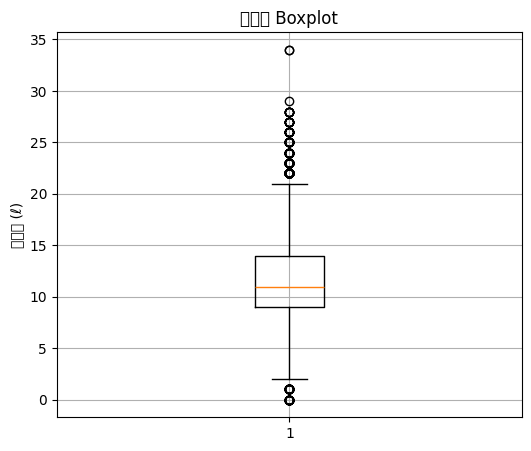

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.boxplot(df['착유량'].dropna(), vert=True)
plt.title('착유량 Boxplot')
plt.ylabel('착유량 (ℓ)')
plt.grid(True)
plt.show()


In [147]:
Q1 = df['착유량'].quantile(0.25)
Q3 = df['착유량'].quantile(0.75)
IQR = Q3 - Q1

# 허용 범위 바깥에 있는 이상치
outliers = df[(df['착유량'] < Q1 - 1.5*IQR) | (df['착유량'] > Q3 + 1.5*IQR)]
inliers = df[(df['착유량'] >= Q1 - 1.5*IQR) | (df['착유량'] <= Q3 + 1.5*IQR)]
print(outliers)

outlier_ratio = len(outliers) / len(df)
print(f"\n이상치 비율: {outlier_ratio:.2%}")


       농장아이디            개체번호  착유량              착유시작일시              착유종료일시  \
16718  20279  20130101010002   24 2021-09-15 21:00:00 2021-09-15 21:09:00   
16757  20279  20130101010002   26 2021-09-24 19:24:00 2021-09-24 19:32:00   
12923  20338  20130106020141   27 2021-09-16 17:29:00 2021-09-16 17:43:00   
15     20278  20130816010079   22 2021-09-08 04:16:00 2021-09-08 04:27:00   
22     20278  20130816010079   23 2021-09-12 07:18:00 2021-09-12 07:28:00   
...      ...             ...  ...                 ...                 ...   
18779  20332  20190802020114   22 2021-09-18 15:37:00 2021-09-18 15:46:00   
18784  20332  20190802020114   22 2021-09-20 20:44:00 2021-09-20 20:53:00   
18786  20332  20190802020114   23 2021-09-21 21:06:00 2021-09-21 21:15:00   
18944  21133  20191014010100    0 2021-09-16 18:13:00 2021-09-16 18:22:00   
18943  20332  20191014020056    0 2021-09-16 18:13:00 2021-09-16 18:22:00   

       착유회차  전도도 혈액흐름    온도   유지방  유단백  공기흐름  착유시간       착유간격       P/F  
1

In [148]:

from scipy.stats import normaltest

# Series 형태로 지정
x_out = outliers['착유량']
x_in  = inliers['착유량']

_, p_out = normaltest(x_out)
_, p_in  = normaltest(x_in)

print(f"Outliers 정규성 p-value: {p_out:.4f}")
print(f"Inliers  정규성 p-value: {p_in:.4f}")



Outliers 정규성 p-value: 0.0000
Inliers  정규성 p-value: 0.0000


/Users/Jiwon/Documents/GitHub/practical_project/wonv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/practical_project/wonv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Jiwon/Documents/GitHub/practical_project/wonv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


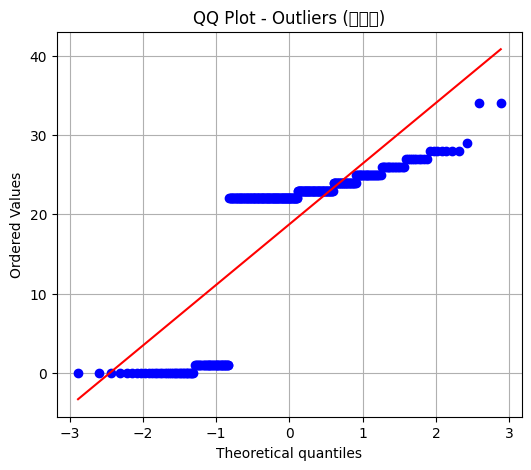

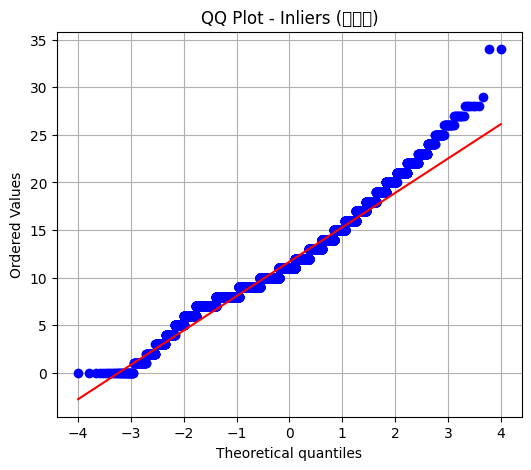

In [149]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# 이상치 그룹 QQ Plot
plt.figure(figsize=(6, 5))
stats.probplot(x_out, dist="norm", plot=plt)
plt.title("QQ Plot - Outliers (착유량)")
plt.grid(True)
plt.show()

# 정상치 그룹 QQ Plot
plt.figure(figsize=(6, 5))
stats.probplot(x_in, dist="norm", plot=plt)
plt.title("QQ Plot - Inliers (착유량)")
plt.grid(True)
plt.show()


정규성 만족 안함 --> 비모수 검정

In [150]:
from scipy.stats import mannwhitneyu

# Series로 지정
x_out = outliers['착유량']
x_in  = inliers['착유량']

# Mann-Whitney U test (양측 검정)
stat, p_val = mannwhitneyu(x_out, x_in, alternative='two-sided')

print(f"Mann–Whitney U-test p-value: {p_val:.4f}")


Mann–Whitney U-test p-value: 0.0000


---> 따라서 두 집단은 통계적으로 유의하게 다른집단 -> 제거 가능

In [151]:
# 착유량 기준 이상치 제거
df_cleaned = df[(df['착유량'] >= Q1 - 1.5*IQR) & (df['착유량'] <= Q3 + 1.5*IQR)].copy()


In [152]:
df_cleaned

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F
21465,21133,20071210010043,13,2021-09-13 07:49:00,2021-09-13 07:58:00,1,7.3,N,38.2,5.0,3.2,2.0,9.0,14.264394,0.640000
21467,21133,20071210010043,11,2021-09-13 18:32:00,2021-09-13 18:41:00,2,7.1,N,38.6,5.2,3.3,1.9,9.0,10.566667,0.634615
21470,21133,20071210010043,11,2021-09-14 07:26:00,2021-09-14 07:34:00,1,7.3,N,38.2,5.6,3.2,1.9,8.0,12.750000,0.571429
21471,21133,20071210010043,12,2021-09-14 18:32:00,2021-09-14 18:40:00,2,7.2,N,38.5,5.0,3.3,2.3,8.0,10.966667,0.660000
21473,21133,20071210010043,11,2021-09-15 07:14:00,2021-09-15 07:23:00,1,7.4,N,38.2,5.3,3.2,1.7,9.0,12.566667,0.603774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,20264,20191027020116,9,2021-09-25 01:29:00,2021-09-25 01:35:00,1,6.2,N,38.8,3.3,3.3,3.7,6.0,7.216667,0.000000
27922,20264,20191027020116,9,2021-09-25 09:15:00,2021-09-25 09:21:00,2,6.4,N,39.2,2.8,3.3,3.7,6.0,7.666667,0.000000
27923,20264,20191027020116,11,2021-09-25 19:28:00,2021-09-25 19:35:00,3,6.4,N,39.5,2.5,3.4,3.9,7.0,10.116667,0.000000
27924,20264,20191027020116,13,2021-09-26 08:22:00,2021-09-26 08:29:00,1,6.2,N,39.4,2.8,3.4,4.0,7.0,12.783333,0.000000


In [153]:
import geopandas as gpd

# .shp 경로 (같은 폴더에 .dbf 등도 있어야 함)
shp_path = "/Users/Jiwon/Documents/GitHub/practical_project/csv/point_1.shp"

# 불러오기
gdf = gpd.read_file(shp_path)

# 좌표 추출
gdf['lon'] = gdf.geometry.x
gdf['lat'] = gdf.geometry.y

# 컬럼 확인
print(gdf.columns)
print(gdf.head())


Index(['name', 'lat', 'lng', 'geometry', 'lon'], dtype='object')
    name           lat         lng                        geometry  \
0  20261  1.932320e+06  126.984022  POINT (954324.987 1932320.271)   
1  20264  1.870009e+06  127.236872  POINT (976535.251 1870008.629)   
2  20278  1.840323e+06  127.207772  POINT (973849.724 1840323.418)   
3  20279  1.899429e+06  127.886441  POINT (1034342.21 1899429.318)   
4  20332  1.931246e+06  127.810530  POINT (1027491.71 1931246.255)   

            lon  
0  9.543250e+05  
1  9.765353e+05  
2  9.738497e+05  
3  1.034342e+06  
4  1.027492e+06  


In [154]:
coord_df = gdf[['name', 'lng', 'lat']].copy()

df = df.merge(coord_df, left_on='농장아이디', right_on='name', how='left')

print(df[['농장아이디', 'lat', 'lng']].head())

   농장아이디           lat         lng
0  21133  1.702684e+06  126.885169
1  21133  1.702684e+06  126.885169
2  21133  1.702684e+06  126.885169
3  21133  1.702684e+06  126.885169
4  21133  1.702684e+06  126.885169


In [155]:
# 1) lng, lat 통일 (예: lng_x → lng, lat_x → lat)
df['lng'] = df['lng_x']
df['lat'] = df['lat_x']

# 2) 불필요한 컬럼 삭제
df.drop(columns=['name_x', 'name_y', 'lng_x', 'lng_y', 'lat_x', 'lat_y'], inplace=True)


KeyError: 'lng_x'

In [ ]:
df.drop(columns=['name'], inplace=True)

In [ ]:
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed

# 1) 날씨 조회 함수 (Open-Meteo)
def fetch_weather(lat, lon, dt):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude":     lat,
        "longitude":    lon,
        "hourly":       "temperature_2m,relativehumidity_2m,windspeed_10m",
        "start":        dt,
        "end":          dt
    }
    try:
        r = requests.get(url, params=params, timeout=5)
        r.raise_for_status()
        data = r.json().get("hourly", {})
        times = data.get("time", [])
        if dt in times:
            i = times.index(dt)
            return lat, lon, dt, {
                "temp_2m": data["temperature_2m"][i],
                "rhum_2m": data["relativehumidity_2m"][i],
                "wspd_10m":data["windspeed_10m"][i]
            }
    except Exception:
        pass
    # 에러나 데이터 누락 시 None 반환
    return lat, lon, dt, {"temp_2m":None, "rhum_2m":None, "wspd_10m":None}

# 2) 중복 키만 뽑아서 리스트로
keys = df[["lat","lng","착유_dt"]].drop_duplicates().itertuples(index=False, name=None)

# 3) 병렬 호출로 캐시 맵 구축
weather_map = {}
with ThreadPoolExecutor(max_workers=20) as exe:
    futures = [exe.submit(fetch_weather, lat, lon, dt) for lat, lon, dt in keys]
    for fut in as_completed(futures):
        lat, lon, dt, w = fut.result()
        weather_map[(lat, lon, dt)] = w

# 4) 맵을 DataFrame으로 전환
weather_df = pd.DataFrame([
    {"lat":lat, "lng":lon, "착유_dt":dt, **w}
    for (lat, lon, dt), w in weather_map.items()
])

# 5) 원본 df에 한 번에 병합
df = df.merge(weather_df, on=["lat","lng","착유_dt"], how="left")

# 6) 결과 확인
print(df[["농장아이디","착유시작일시","lat","lng","temp_2m","rhum_2m","wspd_10m"]].head())


   농장아이디              착유시작일시           lat         lng temp_2m rhum_2m  \
0  21133 2021-09-13 07:49:00  1.702684e+06  126.885169    None    None   
1  21133 2021-09-13 18:32:00  1.702684e+06  126.885169    None    None   
2  21133 2021-09-14 07:26:00  1.702684e+06  126.885169    None    None   
3  21133 2021-09-14 18:32:00  1.702684e+06  126.885169    None    None   
4  21133 2021-09-15 07:14:00  1.702684e+06  126.885169    None    None   

  wspd_10m  
0     None  
1     None  
2     None  
3     None  
4     None  


In [ ]:
df['온도'].describe()

count    21700.000000
mean        39.324147
std          0.635739
min         29.900000
25%         38.900000
50%         39.300000
75%         39.700000
max         42.600000
Name: 온도, dtype: float64

## 유지방 유단백 결측치 어떻게 처리

In [164]:
pf_nan = df[df[['유지방', '유단백']].isna().any(axis=1)]

In [178]:
pf_nan

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F,name,lng,lat
6061,20338,20161021020021,0,2021-09-08 04:58:00,2021-09-08 05:01:00,1,7.0,N,34.6,NaN,NaN,0.2,3.0,12.716667,0.0,20338,127.697124,1.991840e+06
6062,20338,20161021020021,1,2021-09-08 16:11:00,2021-09-08 16:15:00,2,6.6,N,38.1,NaN,NaN,1.6,4.0,11.166667,0.0,20338,127.697124,1.991840e+06
6064,20338,20161021020021,1,2021-09-10 02:30:00,2021-09-10 02:35:00,1,6.6,N,37.0,NaN,NaN,1.8,5.0,20.533333,0.0,20338,127.697124,1.991840e+06
6065,20338,20161021020021,1,2021-09-11 01:39:00,2021-09-11 01:44:00,1,6.6,N,36.8,NaN,NaN,1.8,5.0,23.066667,0.0,20338,127.697124,1.991840e+06
6075,20338,20161021020021,0,2021-09-21 05:00:00,2021-09-21 05:06:00,1,4.7,N,32.4,NaN,NaN,0.3,6.0,36.566667,0.0,20338,127.697124,1.991840e+06
6076,20338,20161021020021,0,2021-09-23 16:18:00,2021-09-23 16:24:00,1,2.1,N,31.9,NaN,NaN,0.4,6.0,59.200000,0.0,20338,127.697124,1.991840e+06
9024,20338,20170524020105,1,2021-09-05 17:39:00,2021-09-05 17:44:00,2,6.4,N,37.1,NaN,NaN,1.2,5.0,5.100000,0.0,20338,127.697124,1.991840e+06
9053,20338,20170524020105,2,2021-09-21 21:20:00,2021-09-21 21:24:00,2,6.8,N,37.2,NaN,NaN,1.4,4.0,6.900000,0.0,20338,127.697124,1.991840e+06
9619,20279,20170722010012,1,2021-09-05 13:40:00,2021-09-05 13:44:00,2,7.8,N,37.6,NaN,NaN,0.9,4.0,9.150000,0.0,20279,127.886441,1.899429e+06
9622,20279,20170722010012,0,2021-09-06 19:14:00,2021-09-06 19:19:00,2,5.8,N,31.0,NaN,NaN,0.4,5.0,10.866667,0.0,20279,127.886441,1.899429e+06


In [168]:
# 결측치 포함한 행이 특이한 패턴 가지는지 먼저 확인
print("=== 결측행 패턴 분석 ===\n")
# 1. 농장 혹은 개체 별로 결측치 많은 행이 있는지 확인
print("\n<농장아이디별 결측행 카운트>")
print(pf_nan.groupby('농장아이디').size())

print("\n<개체별 결측행 카운트>")
print(pf_nan.groupby(['농장아이디','개체번호']).size())

=== 결측행 패턴 분석 ===


<농장아이디별 결측행 카운트>
농장아이디
20264     1
20279    25
20332     3
20338    10
21133     3
dtype: int64

<개체별 결측행 카운트>
농장아이디  개체번호          
20264  20180323020067     1
20279  20170722010012    25
20332  20180127020089     1
       20180314020081     1
       20190307020022     1
20338  20161021020021     6
       20170524020105     2
       20171228020140     1
       20190226020041     1
21133  20180127010011     1
       20180314010058     1
       20190305010086     1
dtype: int64


In [169]:
### 개체번호 20170722010012 중점 분석

df[df['개체번호']==20170722010012]

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F,name,lng,lat
9609,20279,20170722010012,2,2021-09-01 06:15:00,2021-09-01 06:19:00,1,7.6,N,38.7,5.3,3.4,1.0,4.0,11.539474,0.641509,20279,127.886441,1.899429e+06
9610,20279,20170722010012,1,2021-09-01 16:15:00,2021-09-01 16:19:00,2,7.5,N,37.6,5.5,3.3,0.9,4.0,9.933333,0.600000,20279,127.886441,1.899429e+06
9611,20279,20170722010012,2,2021-09-02 01:05:00,2021-09-02 01:09:00,1,7.1,N,37.9,6.2,3.2,1.1,4.0,8.766667,0.516129,20279,127.886441,1.899429e+06
9612,20279,20170722010012,1,2021-09-02 12:24:00,2021-09-02 12:28:00,2,6.9,N,36.9,5.0,3.3,1.1,4.0,11.250000,0.660000,20279,127.886441,1.899429e+06
9613,20279,20170722010012,1,2021-09-03 00:15:00,2021-09-03 00:20:00,1,7.3,N,38.4,5.5,3.4,1.3,5.0,11.783333,0.618182,20279,127.886441,1.899429e+06
9614,20279,20170722010012,1,2021-09-03 10:41:00,2021-09-03 10:46:00,2,7.3,N,37.0,5.2,3.2,1.1,5.0,10.350000,0.615385,20279,127.886441,1.899429e+06
9615,20279,20170722010012,1,2021-09-03 20:01:00,2021-09-03 20:05:00,3,7.5,N,37.2,5.7,3.4,1.1,4.0,9.250000,0.596491,20279,127.886441,1.899429e+06
9616,20279,20170722010012,1,2021-09-04 05:53:00,2021-09-04 05:58:00,1,7.4,N,37.2,4.8,3.3,1.2,5.0,9.800000,0.687500,20279,127.886441,1.899429e+06
9617,20279,20170722010012,1,2021-09-04 17:10:00,2021-09-04 17:14:00,2,7.7,N,38.4,5.2,3.2,1.0,4.0,11.200000,0.615385,20279,127.886441,1.899429e+06
9618,20279,20170722010012,1,2021-09-05 04:28:00,2021-09-05 04:31:00,1,7.9,N,35.7,5.3,3.3,0.8,3.0,11.233333,0.622642,20279,127.886441,1.899429e+06


In [171]:
df[(df['농장아이디']==20279) & (df['착유시작일시'] >= '2021-09-10')]

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F,name,lng,lat
57,20279,20100210010017,5,2021-09-10 02:14:00,2021-09-10 02:19:00,1,6.4,N,39.0,3.4,3.0,1.5,5.0,22.083333,0.000000,20279,127.886441,1.899429e+06
58,20279,20100210010017,3,2021-09-10 11:26:00,2021-09-10 11:31:00,2,5.6,N,39.0,4.1,3.1,1.8,5.0,9.116667,0.756098,20279,127.886441,1.899429e+06
59,20279,20100210010017,4,2021-09-11 01:38:00,2021-09-11 01:44:00,1,5.9,N,39.1,3.7,3.1,1.9,6.0,14.116667,0.837838,20279,127.886441,1.899429e+06
60,20279,20100210010017,7,2021-09-12 07:33:00,2021-09-12 07:40:00,1,6.1,N,38.7,3.2,3.1,1.4,7.0,29.816667,0.000000,20279,127.886441,1.899429e+06
61,20279,20100210010017,5,2021-09-13 02:22:00,2021-09-13 02:28:00,1,6.0,N,38.7,4.0,3.0,1.5,6.0,18.700000,0.750000,20279,127.886441,1.899429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16268,20279,20180807010062,7,2021-09-25 11:18:00,2021-09-25 11:31:00,2,7.9,N,38.6,4.7,2.6,0.7,13.0,5.933333,0.000000,20279,127.886441,1.899429e+06
16269,20279,20180807010062,8,2021-09-25 18:24:00,2021-09-25 18:34:00,3,8.0,N,39.1,4.5,2.7,1.2,10.0,6.883333,0.000000,20279,127.886441,1.899429e+06
16270,20279,20180807010062,5,2021-09-26 01:12:00,2021-09-26 01:19:00,1,8.0,N,38.6,3.9,2.8,2.0,7.0,6.633333,0.000000,20279,127.886441,1.899429e+06
16271,20279,20180807010062,9,2021-09-26 09:16:00,2021-09-26 09:22:00,2,8.2,N,39.6,3.9,2.9,2.7,6.0,7.950000,0.000000,20279,127.886441,1.899429e+06


In [173]:
df[df['개체번호']==	20180807010062]

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F,name,lng,lat
16200,20279,20180807010062,16,2021-09-01 13:38:00,2021-09-01 13:45:00,1,7.8,N,40.3,3.1,3.2,3.4,7.0,8.252083,0.000000,20279,127.886441,1.899429e+06
16201,20279,20180807010062,10,2021-09-02 00:23:00,2021-09-02 00:29:00,1,7.7,N,39.9,3.7,3.0,2.2,6.0,10.633333,0.810811,20279,127.886441,1.899429e+06
16202,20279,20180807010062,9,2021-09-02 07:33:00,2021-09-02 07:43:00,2,7.7,N,38.8,3.9,2.9,3.0,10.0,7.066667,0.000000,20279,127.886441,1.899429e+06
16203,20279,20180807010062,14,2021-09-02 16:47:00,2021-09-02 16:56:00,3,7.7,N,40.6,4.1,2.9,3.3,9.0,9.066667,0.000000,20279,127.886441,1.899429e+06
16204,20279,20180807010062,14,2021-09-03 06:34:00,2021-09-03 06:42:00,1,8.0,N,39.0,3.3,3.0,3.4,8.0,13.633333,0.000000,20279,127.886441,1.899429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16268,20279,20180807010062,7,2021-09-25 11:18:00,2021-09-25 11:31:00,2,7.9,N,38.6,4.7,2.6,0.7,13.0,5.933333,0.000000,20279,127.886441,1.899429e+06
16269,20279,20180807010062,8,2021-09-25 18:24:00,2021-09-25 18:34:00,3,8.0,N,39.1,4.5,2.7,1.2,10.0,6.883333,0.000000,20279,127.886441,1.899429e+06
16270,20279,20180807010062,5,2021-09-26 01:12:00,2021-09-26 01:19:00,1,8.0,N,38.6,3.9,2.8,2.0,7.0,6.633333,0.000000,20279,127.886441,1.899429e+06
16271,20279,20180807010062,9,2021-09-26 09:16:00,2021-09-26 09:22:00,2,8.2,N,39.6,3.9,2.9,2.7,6.0,7.950000,0.000000,20279,127.886441,1.899429e+06


In [177]:
df[df['개체번호']==20161021020021]

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F,name,lng,lat
6052,20338,20161021020021,5,2021-09-01 06:21:00,2021-09-01 06:27:00,1,6.6,N,38.8,5.3,3.6,4.3,6.0,22.320833,0.679245,20338,127.697124,1.991840e+06
6053,20338,20161021020021,3,2021-09-02 06:01:00,2021-09-02 06:35:00,1,6.4,N,38.1,4.6,3.7,3.5,34.0,23.566667,0.804348,20338,127.697124,1.991840e+06
6054,20338,20161021020021,2,2021-09-02 15:59:00,2021-09-02 16:03:00,2,6.3,N,38.4,5.4,3.7,1.7,4.0,9.400000,0.685185,20338,127.697124,1.991840e+06
6055,20338,20161021020021,3,2021-09-03 04:17:00,2021-09-03 04:22:00,1,6.5,N,38.5,4.5,3.6,4.2,5.0,12.233333,0.800000,20338,127.697124,1.991840e+06
6056,20338,20161021020021,3,2021-09-03 16:22:00,2021-09-03 16:25:00,2,6.6,N,39.0,5.0,3.7,2.6,3.0,12.000000,0.740000,20338,127.697124,1.991840e+06
6057,20338,20161021020021,3,2021-09-04 16:20:00,2021-09-04 16:25:00,1,6.6,N,38.8,5.1,3.7,2.5,5.0,23.916667,0.725490,20338,127.697124,1.991840e+06
6058,20338,20161021020021,2,2021-09-06 01:53:00,2021-09-06 01:58:00,1,6.4,N,37.5,5.6,3.6,2.7,5.0,33.466667,0.642857,20338,127.697124,1.991840e+06
6059,20338,20161021020021,2,2021-09-06 13:31:00,2021-09-06 13:36:00,2,6.3,N,38.5,5.3,3.7,3.1,5.0,11.550000,0.698113,20338,127.697124,1.991840e+06
6060,20338,20161021020021,4,2021-09-07 16:11:00,2021-09-07 16:15:00,1,7.3,N,38.4,4.8,3.7,3.7,4.0,26.583333,0.770833,20338,127.697124,1.991840e+06
6061,20338,20161021020021,0,2021-09-08 04:58:00,2021-09-08 05:01:00,1,7.0,N,34.6,NaN,NaN,0.2,3.0,12.716667,0.000000,20338,127.697124,1.991840e+06


In [179]:
df['전도도'].describe()

count    21700.00000
mean         6.91370
std          0.54261
min          2.10000
25%          6.70000
50%          6.90000
75%          7.20000
max         10.00000
Name: 전도도, dtype: float64

In [180]:
df[df['농장아이디']==20332]

,농장아이디,개체번호,착유량,착유시작일시,착유종료일시,착유회차,전도도,혈액흐름,온도,유지방,유단백,공기흐름,착유시간,착유간격,P/F,name,lng,lat
23,20332,20071210020086,13,2021-09-13 07:49:00,2021-09-13 07:58:00,1,7.3,N,38.2,5.0,3.2,2.0,9.0,14.264394,0.640000,20332,127.81053,1.931246e+06
24,20332,20071210020086,11,2021-09-13 18:32:00,2021-09-13 18:41:00,2,7.1,N,38.6,5.2,3.3,1.9,9.0,10.566667,0.634615,20332,127.81053,1.931246e+06
25,20332,20071210020086,11,2021-09-14 07:26:00,2021-09-14 07:34:00,1,7.3,N,38.2,5.6,3.2,1.9,8.0,12.750000,0.571429,20332,127.81053,1.931246e+06
26,20332,20071210020086,12,2021-09-14 18:32:00,2021-09-14 18:40:00,2,7.2,N,38.5,5.0,3.3,2.3,8.0,10.966667,0.660000,20332,127.81053,1.931246e+06
27,20332,20071210020086,11,2021-09-15 07:14:00,2021-09-15 07:23:00,1,7.4,N,38.2,5.3,3.2,1.7,9.0,12.566667,0.603774,20332,127.81053,1.931246e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21648,20332,20191016020070,14,2021-09-25 10:23:00,2021-09-25 10:31:00,2,7.5,N,38.6,3.6,3.2,2.2,8.0,7.866667,0.888889,20332,127.81053,1.931246e+06
21649,20332,20191016020070,15,2021-09-25 19:22:00,2021-09-25 19:32:00,3,7.6,N,39.2,3.4,3.3,2.1,10.0,8.850000,0.000000,20332,127.81053,1.931246e+06
21650,20332,20191016020070,16,2021-09-26 06:41:00,2021-09-26 06:51:00,1,7.6,N,38.7,3.5,3.2,2.0,10.0,11.150000,0.000000,20332,127.81053,1.931246e+06
21651,20332,20191016020070,12,2021-09-26 14:15:00,2021-09-26 14:23:00,2,7.4,N,39.4,3.5,3.2,2.0,8.0,7.400000,0.000000,20332,127.81053,1.931246e+06
